In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops

In [2]:
ops.reset_default_graph()
sess = tf.Session()

# 创建数据

In [7]:
x_vals = np.linspace(start=-10., stop=10., num=100)

# 1 激活函数

## 1.1 ReLU

In [23]:
print(sess.run(tf.nn.relu([-3., 3., 10.])))
y_relu = sess.run(tf.nn.relu(x_vals))

[  0.   3.  10.]


## 1.2 ReLU-6

In [11]:
print(sess.run(tf.nn.relu6([-3., 3., 10.])))
y_relu6 = sess.run(tf.nn.relu6(x_vals))

[ 0.  3.  6.]


## 1.3 sigmoid

In [13]:
print(sess.run(tf.nn.sigmoid([-1., 0., 1.])))
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))

[ 0.26894143  0.5         0.7310586 ]


## 1.4 tanh

In [15]:
print(sess.run(tf.nn.tanh([-1., 0., 1.])))
y_tanh = sess.run(tf.nn.tanh(x_vals))

[-0.76159418  0.          0.76159418]


## 1.5 Softsign

In [17]:
print(sess.run(tf.nn.softsign([-1., 0., 1.])))
y_softsign = sess.run(tf.nn.softsign(x_vals))

[-0.5  0.   0.5]


## 1.6 Softplus

In [19]:
print(sess.run(tf.nn.softplus([-1., 0., 1.])))
y_softplus = sess.run(tf.nn.softplus(x_vals))

[ 0.31326166  0.69314718  1.31326163]


## 1.7 elu

In [21]:
print(sess.run(tf.nn.elu([-1., 0., 1.])))
y_elu = sess.run(tf.nn.elu(x_vals))

[-0.63212055  0.          1.        ]


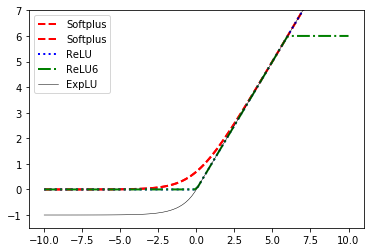

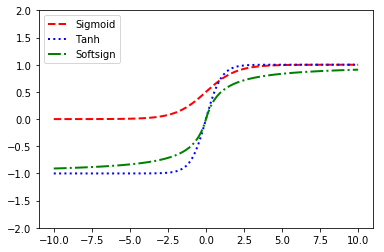

In [24]:
plt.plot(x_vals, y_softplus, 'r--', label='Softplus', linewidth=2)
plt.plot(x_vals, y_relu, 'b:', label='ReLU', linewidth=2)
plt.plot(x_vals, y_relu6, 'g-.', label='ReLU6', linewidth=2)
plt.plot(x_vals, y_elu, 'k-', label='ExpLU', linewidth=0.5)
plt.ylim([-1.5,7])
plt.legend(loc='upper left')
plt.show()

plt.plot(x_vals, y_sigmoid, 'r--', label='Sigmoid', linewidth=2)
plt.plot(x_vals, y_tanh, 'b:', label='Tanh', linewidth=2)
plt.plot(x_vals, y_softsign, 'g-.', label='Softsign', linewidth=2)
plt.ylim([-2,2])
plt.legend(loc='upper left')
plt.show()

# 2 激活函数的使用

## 2.1 设置种子和批度

In [3]:
tf.set_random_seed(5)
np.random.seed(42)

batch_size = 50

## 2.1 构建占位符和变量

In [4]:
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

## 2.2 两个不同的激活函数

In [5]:
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

## 2.3 两个不同的损失函数sigmoid和relu

In [6]:
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

## 2.4 初始化所有变量

In [7]:
init = tf.global_variables_initializer()
sess.run(init)

## 2.5 优化损失函数

In [8]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)

## 2.6 训练模型

In [10]:
print('\nOptimizing Sigmoid AND Relu Output to 0.75')
loss_vec_sigmoid = []
loss_vec_relu = []
for i in range(500):
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]])
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data: x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))    
    
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals}))
    
    if i%50==0:
        print('sigmoid = ' + str(np.mean(sigmoid_output)) + ' relu = ' + str(np.mean(relu_output)))
        


Optimizing Sigmoid AND Relu Output to 0.75
sigmoid = 0.126552 relu = 2.02276
sigmoid = 0.178638 relu = 0.75303
sigmoid = 0.247698 relu = 0.74929
sigmoid = 0.344675 relu = 0.749955
sigmoid = 0.440066 relu = 0.754
sigmoid = 0.52369 relu = 0.754772
sigmoid = 0.583739 relu = 0.75087
sigmoid = 0.627335 relu = 0.747023
sigmoid = 0.65495 relu = 0.751805
sigmoid = 0.674526 relu = 0.754707


## 画图，评价模型

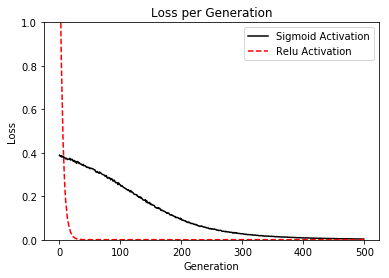

In [11]:
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()